2000-01-01    0.461136
2000-01-02    1.653992
2000-01-03   -0.754476
2000-01-04    0.156704
2000-01-05    2.169456
Freq: D, dtype: float64
2000-01-01    0.461136
2000-01-02    2.115128
2000-01-03    1.360653
2000-01-04    1.517356
2000-01-05    3.686812
Freq: D, dtype: float64


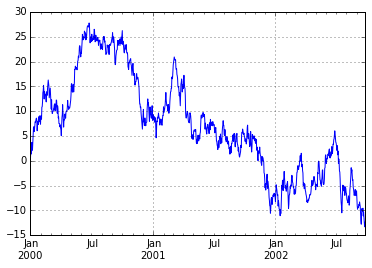

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse

%matplotlib inline

# Challenge One
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
pp(ts.head())
ts = ts.cumsum()
pp(ts.head())

ts.plot()


In [15]:
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot
    
t2015_df                   = pd.read_csv("movie_data.csv")
t2015_df["release date"]   = t2015_df["release date"].apply(lambda x: parse(x).date())
t2015_df["domestic gross"] = t2015_df["domestic gross"].apply(lambda x: x.replace(',',''))
t2015_df["domestic gross"] = t2015_df["domestic gross"].apply(lambda x: int(x.strip("$")))
t2015_df.sort("release date")

t2015_df.plot(x="release date", y="domestic gross", kind="bar")

t2015_df.sort("domestic gross")
t2015_df.plot(x="runtime", y="domestic gross", style='o')


Index([u'title', u'opening_weekend', u'foreign_gross', u'release_date', u'posts_score', u'comments_score'], dtype='object')

In [24]:
top_2013_df = pd.read_csv("2013_top_100.csv")
# top_2013_df.plot()
# find average runtime and domestic gross at each level of rating
rating_df = top_2013_df.groupby("Rating")
print rating_df.size()
# print rating_df.head()
print rating_df.mean()

Rating
G          1
PG        15
PG-13     47
R         37
dtype: int64
                 Budget  DomesticTotalGross     Runtime
Rating                                                 
G                   NaN        2.684928e+08  107.000000
PG      93933333.333333        1.311357e+08   99.933333
PG-13   96609756.097561        1.114498e+08  117.510638
R       38863636.363636        6.989243e+07  110.729730


Rating
G         Axes(0.547727,0.547727;0.352273x0.352273)
PG        Axes(0.547727,0.547727;0.352273x0.352273)
PG-13     Axes(0.547727,0.547727;0.352273x0.352273)
R         Axes(0.547727,0.547727;0.352273x0.352273)
dtype: object

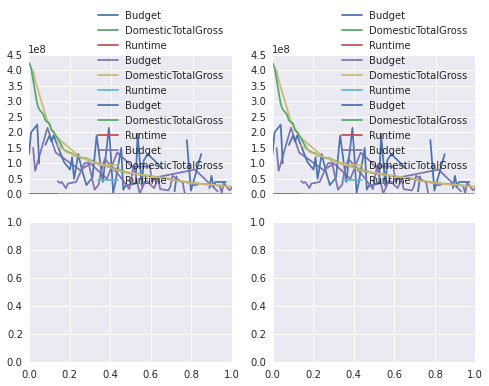

In [33]:
# Make one figure with (N=the number of MPAA ratings there are) subplots, 
# and in each plot the release date vs the domestic total gross
fig, axes = plt.subplots(nrows=2, ncols=2)
# fig, (ax1, ax2) = subplots(2, 1, sharex=True)
rating_df.plot(ax=axes[0,0])
rating_df.plot(ax=axes[0,1])